In [ ]:
# NOTES
# install deps
# conda activate birdenv
# pip install tensorflow-datasets
# pip install opencv-python

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

In [8]:
print("with bird:", len(os.listdir("dataset/with_bird")))
print("no bird:", len(os.listdir("dataset/no_bird")))

with bird: 190
no bird: 190


In [ ]:
img_size = (180, 180)  # Resize target for all images
batch_size = 32        # Number of images loaded per training step

# ✅ Load your custom dataset from the 'dataset/' folder
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int'  # ✅ for binary classification (0 or 1)
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int'
)

# ✅ Preprocessing
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

ds_train = train_ds.map(preprocess).prefetch(tf.data.AUTOTUNE)
ds_val = val_ds.map(preprocess).prefetch(tf.data.AUTOTUNE)

Found 380 files belonging to 2 classes.
Using 304 files for training.
Found 380 files belonging to 2 classes.
Using 76 files for validation.


In [12]:
for images, labels in train_ds.take(1):
    print("Image batch shape:", images.shape)
    print("Label batch:", labels.numpy())


Image batch shape: (32, 180, 180, 3)
Label batch: [1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1]


In [94]:
# Data augmentation block
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

In [14]:
# Build CNNN (Convolutional Neural Network) - test - bird

model = models.Sequential([
    layers.Input(shape=(180, 180, 3)),
    layers.Conv2D(16, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')  # either bird and no bird
])

In [16]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    ds_train,
    validation_data=ds_val,
    epochs=10
)

print(history.history)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.4940 - loss: 1.3157 - val_accuracy: 0.5263 - val_loss: 0.6933
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.5136 - loss: 0.7056 - val_accuracy: 0.4737 - val_loss: 0.7021
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.5348 - loss: 0.6831 - val_accuracy: 0.4737 - val_loss: 0.6919
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.5602 - loss: 0.6601 - val_accuracy: 0.6053 - val_loss: 0.6683
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.7157 - loss: 0.6163 - val_accuracy: 0.6316 - val_loss: 0.6520
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.7134 - loss: 0.5841 - val_accuracy: 0.6711 - val_loss: 0.6634
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.9024 - loss: 0.4616 - val_accuracy: 0.6053 - val_loss: 0.6925
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.8332 - loss: 0.3953 - val_accuracy: 0.5789 - 

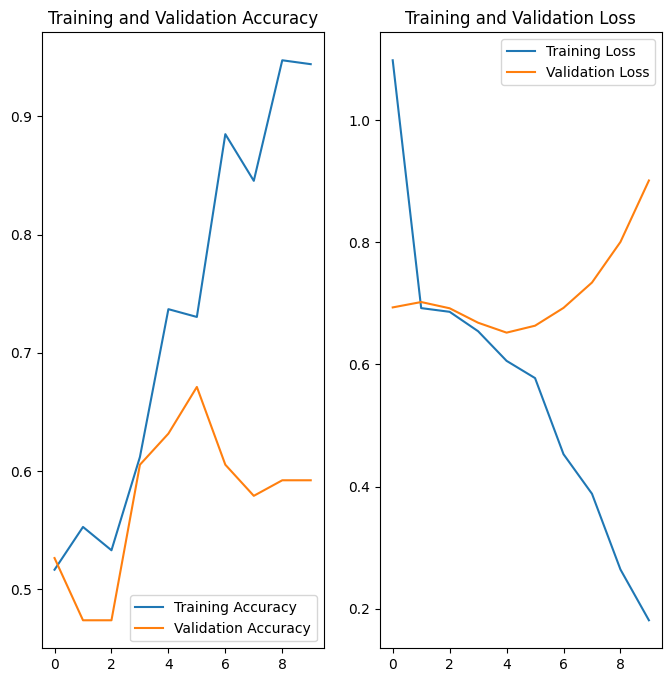

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = 10

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
model.save("bird_detection_model_v1.keras")

In [7]:
model_name = "bird_detection_model_v1"

# Load the model from .keras file
model = tf.keras.models.load_model(f"{model_name}.keras")

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the .tflite model
with open(f"{model_name}.tflite", "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmpixbyziu5\assets


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmpixbyziu5\assets


Saved artifact at 'C:\Users\User\AppData\Local\Temp\tmpixbyziu5'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  2247619798016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2247619802944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2247620074432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2247620079360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2247620122352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2247620119184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2247620130976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2247620129040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2247620129744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2247620202336: TensorSpec(shape=(), dtype=tf.resource, name=None)
